<a href="https://colab.research.google.com/github/sridharsakkari/Demand-Forecasting/blob/master/bikesharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [476]:
!gdown --id 1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3 --output london_bike_sharing.csv

Downloading...
From: https://drive.google.com/uc?id=1nPw071R3tZi4zqVcmXA6kXVTe43Ex6K3
To: /content/london_bike_sharing.csv
100% 1.03M/1.03M [00:00<00:00, 65.5MB/s]


In [477]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Problem Statement: 

To predict the future bike shares given the historical count of bike shares used in London City.


# Step 1: Data Import and initial intuition

In [478]:
raw_data = pd.read_csv('london_bike_sharing.csv',delimiter = ',')

In [479]:
raw_data.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [480]:
bike_data = raw_data[['timestamp','t1','t2','hum','wind_speed','weather_code','is_holiday','is_weekend','season','cnt']]

In [481]:
bike_data.columns = ['timestamp','Temp_1','Temp_2','humidity','wind_speed','weather_code','is_holiday','is_weekend','season','count']

In [482]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   Temp_1        17414 non-null  float64
 2   Temp_2        17414 non-null  float64
 3   humidity      17414 non-null  float64
 4   wind_speed    17414 non-null  float64
 5   weather_code  17414 non-null  float64
 6   is_holiday    17414 non-null  float64
 7   is_weekend    17414 non-null  float64
 8   season        17414 non-null  float64
 9   count         17414 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [483]:
bike_data['timestamp'] = pd.to_datetime(bike_data['timestamp'])

In [484]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   Temp_1        17414 non-null  float64       
 2   Temp_2        17414 non-null  float64       
 3   humidity      17414 non-null  float64       
 4   wind_speed    17414 non-null  float64       
 5   weather_code  17414 non-null  float64       
 6   is_holiday    17414 non-null  float64       
 7   is_weekend    17414 non-null  float64       
 8   season        17414 non-null  float64       
 9   count         17414 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [636]:
bike_data.shape

(17544, 13)

We have hourly data of bike share count for years 2015 and 2016 together with other attributes such as temperature, humidity, holidays and weather_code and weekend details.

#Step 2 : Check for outliers or missing values 

In [486]:
bike_data.isna().sum()

timestamp       0
Temp_1          0
Temp_2          0
humidity        0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
count           0
dtype: int64

There are no NA values but certainly some datetimes were missing. 

In [487]:
date_time = pd.date_range(start = '01/04/2015 00:00:00', end = '01/03/2017 23:59:59',freq ='H')

In [488]:
bike_data.set_index('timestamp',drop =False,inplace = True)

In [489]:
bike_data = bike_data.reindex(date_time,fill_value = np.nan)

In [490]:
bike_data.isna().sum()

timestamp       130
Temp_1          130
Temp_2          130
humidity        130
wind_speed      130
weather_code    130
is_holiday      130
is_weekend      130
season          130
count           130
dtype: int64

In [491]:
# replace nan values with mean values
bike_data.fillna(value = bike_data.mean(),inplace = True)

In [492]:
bike_data['timestamp'] = date_time

In [493]:
bike_data.isna().sum()

timestamp       0
Temp_1          0
Temp_2          0
humidity        0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
count           0
dtype: int64

In [494]:
bike_data['year'] = bike_data['timestamp'].apply(lambda x:x.year)
bike_data['week'] = bike_data['timestamp'].apply(lambda x:x.week)
bike_data['month'] = bike_data['timestamp'].apply(lambda x:x.month)
bike_data['hour'] = bike_data['timestamp'].apply(lambda x:x.hour)
bike_data['day'] = bike_data['timestamp'].apply(lambda x:x.day)


In [495]:
cols = ['timestamp', 'Temp_1', 'Temp_2', 'humidity', 'wind_speed',
       'weather_code', 'is_holiday', 'is_weekend', 'season', 'hour', 'year',
       'week', 'month','day', 'count']

In [496]:
bike_data = bike_data.reindex(columns = cols) 

In [497]:
bike_data['is_holiday'][bike_data['is_holiday'] <= 0.5] = 0
bike_data['is_weekend'][bike_data['is_weekend'] <= 0.5] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [498]:
bike_data['season'][bike_data['season'] == 1.49207534 ] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Step 3: Exploratory data Analysis 
## Univariate Analysis & Bivariate Analysis

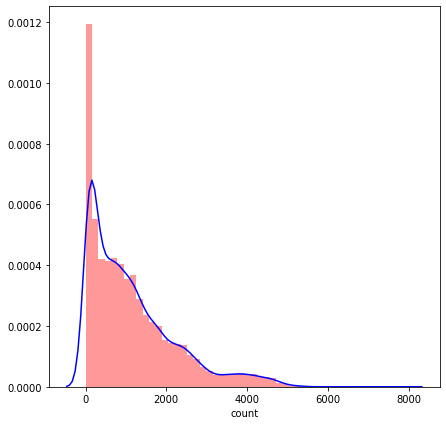

In [499]:
plt.rcParams['figure.figsize'] = (7,7)

sns.distplot(bike_data['count'],hist_kws={"linewidth": 1, "alpha": 0.4, "color": "r"},color = 'b')

In [501]:
import plotly.graph_objects as go 

In [502]:
mov_avg_monthly = bike_data.rolling(7*24).mean()
mov_avg_monthly.reset_index(inplace = True)

mov_avg_daily = bike_data.rolling(24).mean()
mov_avg_daily.reset_index(inplace = True)


In [503]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=bike_data['timestamp'], y=bike_data['count'],
                    mode='lines',
                    name='hourly',))

fig.add_trace(go.Scatter(x=mov_avg_daily['index'], y=mov_avg_daily['count'],
                    mode='lines',
                    name='daily average'))

fig.add_trace(go.Scatter(x=mov_avg_monthly['index'], y=mov_avg_monthly['count'],
                    mode='lines',
                    name='monthly average'))

fig.show()

From the above plot, it can be deciphered that there is a seasonality in the dataset. The number of bike shares are high in the months of july to october compared to rest. This might be owing to the seasonal factor which we will analyse further in bivariate analysis. 


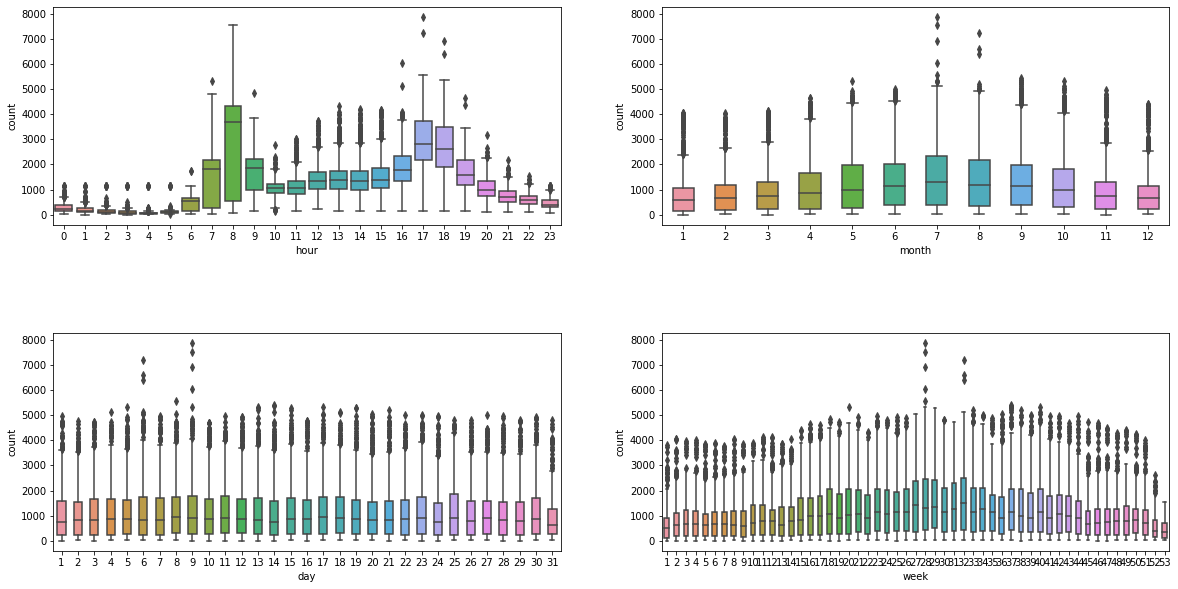

In [558]:
plt.rcParams['figure.figsize'] = (20,10)
fig,axs = plt.subplots(2,2)
plt.subplots_adjust(hspace = 0.5)
axs = axs.flatten()
sns.boxplot(x = 'hour',y = 'count', data = bike_data,ax = axs[0])
sns.boxplot(x = 'month', y = 'count',data = bike_data,ax = axs[1],width = 0.5)
sns.boxplot(x = 'day', y = 'count',data = bike_data,ax = axs[2],width = 0.5)
sns.boxplot(x = 'week', y = 'count',data = bike_data,ax = axs[3],width = 0.5)



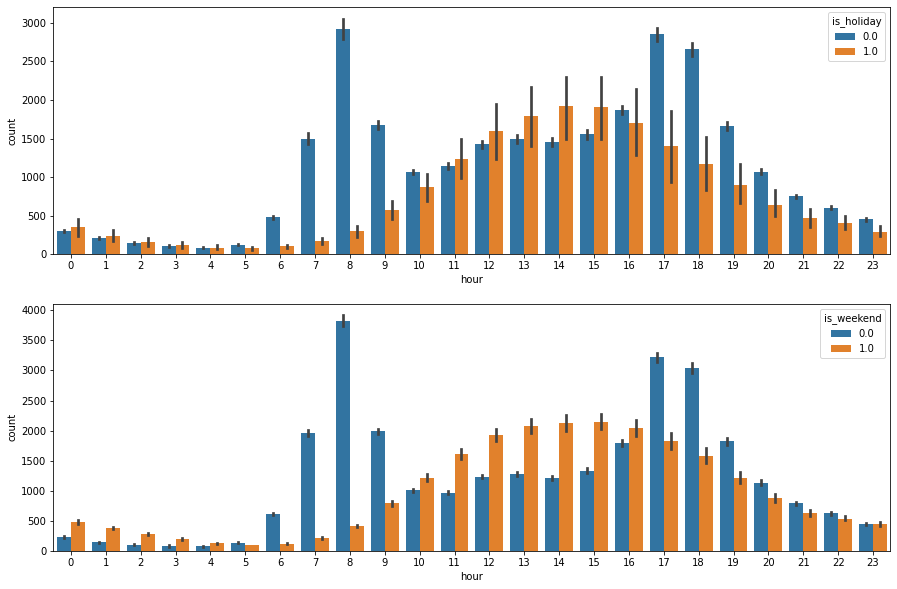

In [505]:
fig,axs = plt.subplots(2,1,figsize = (15,10))
axs = axs.flatten()
sns.barplot(x = 'hour', y = 'count', hue = 'is_holiday',data = bike_data,ax = axs[0])
sns.barplot(x = 'hour', y = 'count', hue = 'is_weekend',data = bike_data,ax = axs[1])


It can also be inferred from the above box plots that the number of bike shares are very high during peak hours such as 8:00 AM and 17:00 and 18:00 Hrs owing on weekdays and the number of shares are comparitively higher on the off peak hours during weekends and holidays. 

In [506]:
mean_temp = bike_data.groupby(['month'])['Temp_2','Temp_1'].mean().reset_index()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [507]:
fig = go.Figure()
fig.add_trace(go.Box(x = bike_data['month'].values,y =bike_data['Temp_1'].values,name = 'Temp_1'))
fig.add_trace(go.Box(x = bike_data['month'].values,y =bike_data['Temp_2'].values,name = 'Temp_2'))
fig.update_layout(boxmode = 'group', xaxis_title = 'Months',yaxis_title = 'Temperature')
fig.show()

In [508]:
bike_data['season'] = pd.cut(bike_data['season'], bins = 4, labels = ['spring','summer','fall','winter'])

In [509]:
bike_data['Temp_2'] = pd.cut(bike_data['Temp_2'].values, bins = 3, labels = ['cold','warm','hot'])

In [510]:
bike_data.drop('Temp_1',inplace = True,axis = 1)

In [511]:
px.box(x = 'Temp_2', y = 'count', data_frame = bike_data)

In [512]:
px.box(x = 'season', y = 'count', data_frame = bike_data)

In [513]:
bike_data.drop('timestamp',inplace=True,axis = 1)

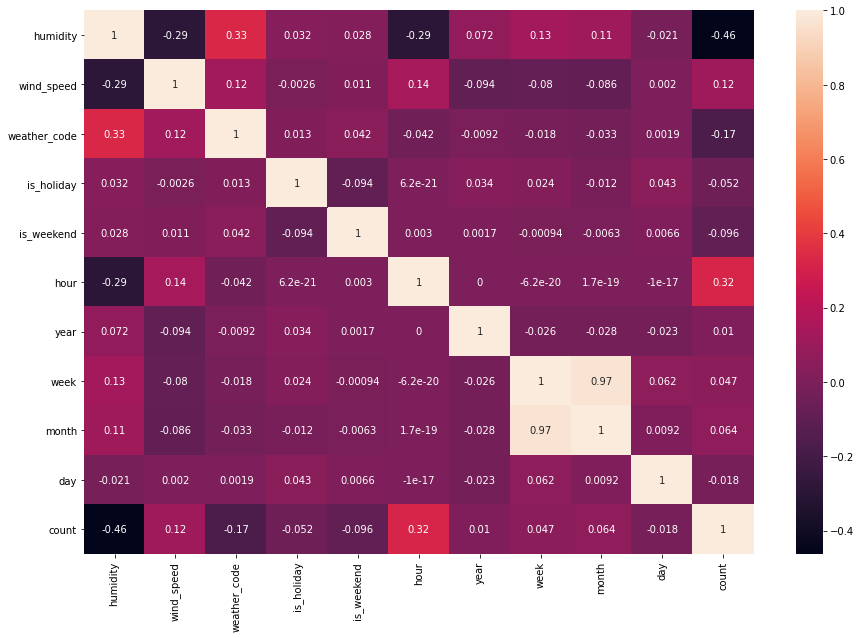

In [514]:
sns.heatmap(bike_data.corr(),color = 'blue',annot = True)

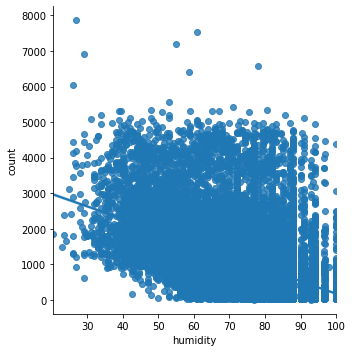

In [515]:
sns.lmplot(x = 'humidity',y = 'count',data = bike_data)

In [520]:
bike_data_model = bike_data[['is_holiday','is_weekend','Temp_2','season','hour','week','day','month','count']]

In [521]:
bike_data_model.head()

,is_holiday,is_weekend,Temp_2,season,hour,week,day,month,count
2015-01-04 00:00:00,0.0,1.0,cold,winter,0,1,4,1,182.0
2015-01-04 01:00:00,0.0,1.0,cold,winter,1,1,4,1,138.0
2015-01-04 02:00:00,0.0,1.0,cold,winter,2,1,4,1,134.0
2015-01-04 03:00:00,0.0,1.0,cold,winter,3,1,4,1,72.0
2015-01-04 04:00:00,0.0,1.0,cold,winter,4,1,4,1,47.0


In [550]:
# convert categorical variables to dummy numerics

df1 = pd.get_dummies(bike_data_model[['Temp_2','season']], drop_first= True,prefix=None)


In [559]:
data = pd.concat([df1,bike_data_model],axis =1)

In [560]:
data.drop(['Temp_2','season','week','day','month'],axis = 1,inplace = True)

In [561]:
data.head()

,Temp_2_warm,Temp_2_hot,season_summer,season_fall,season_winter,is_holiday,is_weekend,hour,count
2015-01-04 00:00:00,0,0,0,0,1,0.0,1.0,0,182.0
2015-01-04 01:00:00,0,0,0,0,1,0.0,1.0,1,138.0
2015-01-04 02:00:00,0,0,0,0,1,0.0,1.0,2,134.0
2015-01-04 03:00:00,0,0,0,0,1,0.0,1.0,3,72.0
2015-01-04 04:00:00,0,0,0,0,1,0.0,1.0,4,47.0


# Step 4: Model Building and Data Preparation

In [562]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split


In [607]:
scaler  = RobustScaler()

In [608]:
data_scaled = pd.DataFrame(scaler.fit_transform(data),columns = data.columns)

In [609]:
X_input = data_scaled[data_scaled.columns[:-1]]
Y = data_scaled[data_scaled.columns[-1]]

In [610]:
X_train,X_test,Y_train,Y_test = train_test_split(X_input,Y,random_state = 42,shuffle =False,test_size = 0.2)

In [612]:
time_steps = 10

In [611]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [615]:
X_train_LSTM,Y_train_LSTM = create_dataset(X_train,Y_train,time_steps = 10)
X_test_LSTM,Y_test_LSTM = create_dataset(X_test,Y_test,time_steps = 10)


To train a dataset with LSTM, the dataset shall be transformed into 3D in the form of 
(n_examples, timesteps, features)

In [620]:
print('shape of training dataset:',X_train_LSTM.shape)
print('shape of test dataset:', X_test_LSTM.shape)
print('shape of train demand:', Y_train_LSTM.shape)
print('shape of test demand:', Y_test_LSTM.shape)


shape of training dataset: (14025, 10, 8)
shape of test dataset: (3499, 10, 8)
shape of train demand: (14025,)
shape of test demand: (3499,)


In [623]:
from keras.models import Sequential
from keras.layers import Input,Dense,Conv2D,MaxPooling2D,Flatten,ZeroPadding2D,add,BatchNormalization,Activation,AveragePooling2D,Dropout
from keras.layers import LSTM,Bidirectional
from keras.utils import to_categorical,plot_model
from keras.optimizers import SGD,Adam

from keras.models import load_model,Model
from keras.backend import placeholder
from keras.initializers import glorot_uniform
from keras.utils import multi_gpu_model
from keras.metrics import RootMeanSquaredError
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [687]:
model = Sequential()
model.add(Bidirectional(LSTM(128,input_shape = (X_train_LSTM.shape[1],X_train_LSTM.shape[2]))))

model.add(Dropout(0.2))
model.add(Dense(1))



In [688]:
opt = Adam(lr = 0.0001)
model.compile(loss = 'mean_squared_error',optimizer = opt)
history = model.fit(X_train_LSTM,Y_train_LSTM,epochs = 50,batch_size = 32,validation_data = (X_test_LSTM,Y_test_LSTM),verbose = 1,shuffle = False)


Train on 14025 samples, validate on 3499 samples
Epoch 1/50
14025/14025 [==============================] - 11s 756us/step - loss: 0.4025 - val_loss: 0.4181
Epoch 2/50
14025/14025 [==============================] - 10s 709us/step - loss: 0.3313 - val_loss: 0.3413
Epoch 3/50
14025/14025 [==============================] - 10s 711us/step - loss: 0.2581 - val_loss: 0.2260
Epoch 4/50
14025/14025 [==============================] - 10s 718us/step - loss: 0.1726 - val_loss: 0.1808
Epoch 5/50
14025/14025 [==============================] - 10s 708us/step - loss: 0.1426 - val_loss: 0.1500
Epoch 6/50
14025/14025 [==============================] - 10s 708us/step - loss: 0.1267 - val_loss: 0.1295
Epoch 7/50
14025/14025 [==============================] - 10s 712us/step - loss: 0.1152 - val_loss: 0.1187
Epoch 8/50
14025/14025 [==============================] - 10s 710us/step - loss: 0.1053 - val_loss: 0.1100
Epoch 9/50
14025/14025 [==============================] - 10s 712us/step - loss: 0.0988 - val_l

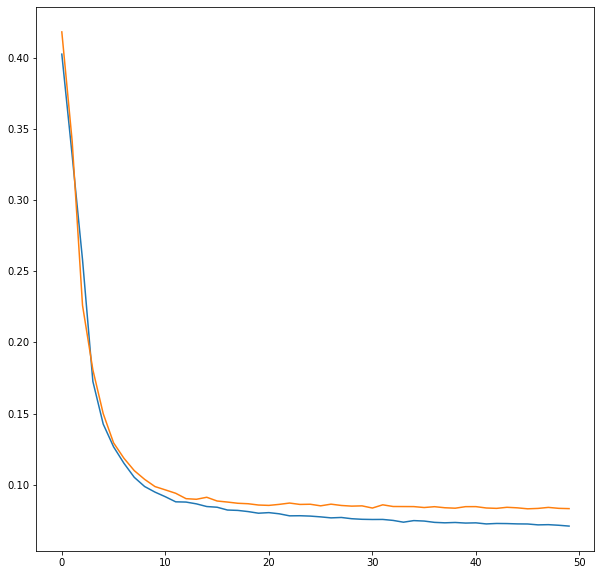

In [689]:
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'],label = 'test_loss')


In [690]:
results = model.evaluate(X_train_LSTM, Y_train_LSTM, batch_size=32)
pred_train = model.predict(X_train_LSTM)  #scaled
train_desc = np.concatenate((X_train.values[:len(pred_train),:],pred_train),axis =1)
inv_train_pred = scaler.inverse_transform(train_desc)#descaled
Y_pred_train = inv_train_pred[:,-1]

act_desc = np.concatenate((X_train.values[:len(pred_train),:],Y_train_LSTM.reshape(-1,1)),axis =1)
inv_train_act = scaler.inverse_transform(act_desc)#descaled
Y_act_train = inv_train_act[:,-1]


#_,mse = model.evaluate(Y_act_train,Y_pred_train)
print('mean squared error for train:',results)


14025/14025 [==============================] - 2s 121us/step
mean squared error for train: 0.07655818162436154


In [691]:
results = model.evaluate(X_test_LSTM, Y_test_LSTM, batch_size=32)
pred_test = model.predict(X_test_LSTM)  #scaled
test_desc = np.concatenate((X_test.values[:len(pred_test),:],pred_test),axis =1)
inv_test_pred = scaler.inverse_transform(test_desc)#descaled
Y_pred_test = inv_test_pred[:,-1]

act_desc = np.concatenate((X_test.values[:len(pred_test),:],Y_test_LSTM.reshape(-1,1)),axis =1)
inv_test_act = scaler.inverse_transform(act_desc)#descaled
Y_act_test = inv_test_act[:,-1]



#_,mse = model.evaluate(Y_act_train,Y_pred_train)
print('mean squared error for test:',results)


3499/3499 [==============================] - 0s 124us/step
mean squared error for test: 0.083295357049738


In [692]:
train_pred = pd.concat((pd.DataFrame(Y_act_train),pd.DataFrame(Y_pred_train)),axis = 1)
train_pred.columns = ['actual','predicted']
train_pred['mode'] = 'train'

In [693]:
test_pred = pd.concat((pd.DataFrame(Y_act_test),pd.DataFrame(Y_pred_test)),axis = 1)
test_pred.columns = ['actual','predicted']
test_pred['mode'] = 'test'

In [694]:
data_pred_act = pd.concat((train_pred,test_pred),axis = 0)

In [695]:
data_pred_act.reset_index(inplace = True)

In [696]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=data_pred_act['actual'],
                    mode='lines',
                    name='actual'))

fig.add_trace(go.Scatter(y=data_pred_act['predicted'],
                    mode='lines',
                    name='predicted'))

fig.show()

[(0.0, 8000.0), (0.0, 8000.0)]

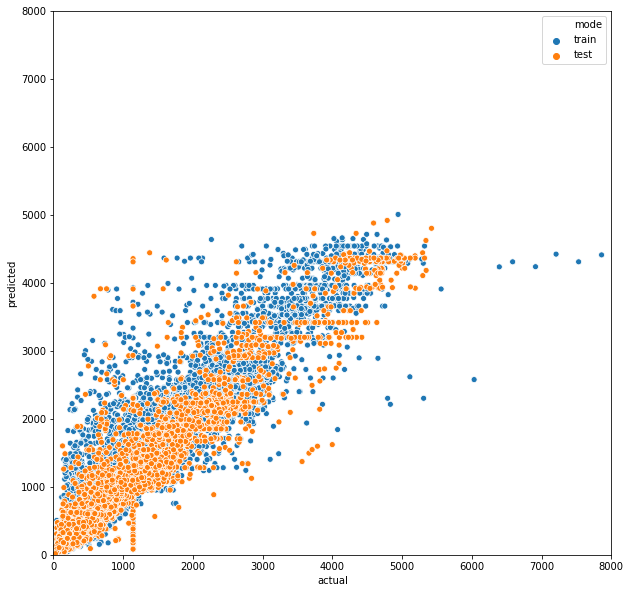

In [697]:
plt.rcParams['figure.figsize'] = (10,10)
g = sns.scatterplot(x = 'actual',y = 'predicted',data = data_pred_act, hue='mode')
g.set(xlim = (0,8000),ylim = (0,8000))